In [1]:
import pandas as pd
import numpy as np
import datetime

# packages for fetching stock data from internet from yahoo APIs
# import pandas_datareader
# import pandas_datareader.data as web

#  Start Date for fetching the stock data
start = datetime.datetime(2012,1,1)

#  End Date for fetching the stock data
end = datetime.datetime(2017,1,1)

# tesla = web.DataReader('TSLA', 'yahoo', start, end)
# ford = web.DataReader('F', 'yahoo', start, end)
# gmotors = web.DataReader('GM', 'yahoo', start, end)

# Wrting this data to CSV
# tesla.to_csv("tesla.csv")
# ford.to_csv("ford.csv")
# gmotors.to_csv("gmotors.csv")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


# Reading Data for Different Car Companies from csv
tesla = pd.read_csv('Tesla.csv')
gmotors = pd.read_csv('GM.csv')
ford = pd.read_csv('Ford.csv')

# Setting index of all the above fetched dataframe to Date
tesla.set_index('Date', inplace=True)
gmotors.set_index('Date', inplace=True)
ford.set_index('Date', inplace=True)

In [3]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
03-01-2012,29.500000,27.650000,28.940001,28.080000,928100,28.080000
04-01-2012,28.670000,27.500000,28.209999,27.709999,630100,27.709999
05-01-2012,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
06-01-2012,27.790001,26.410000,27.200001,26.910000,986300,26.910000
09-01-2012,27.490000,26.120001,27.000000,27.250000,897000,27.250000


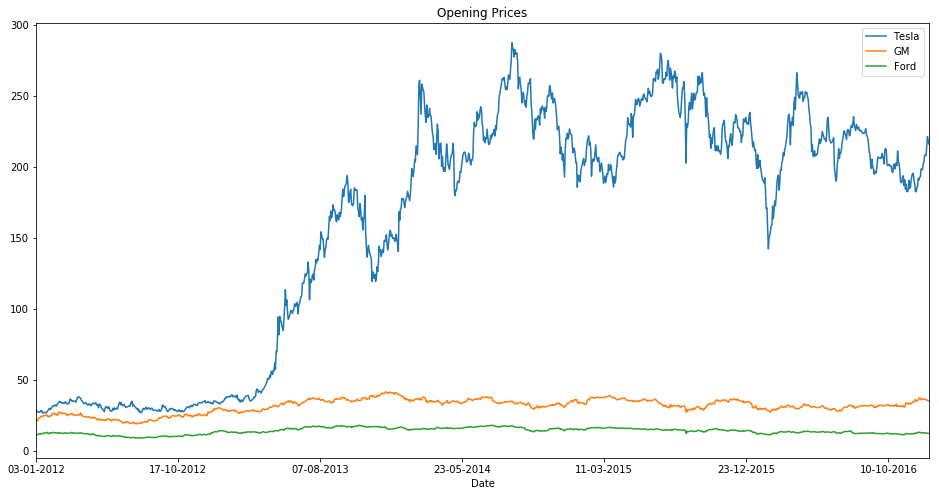

In [5]:
# Visualizing the Opening Prices
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Opening Prices')
gmotors['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
# Semicolon below hid the legend output
plt.legend(); 

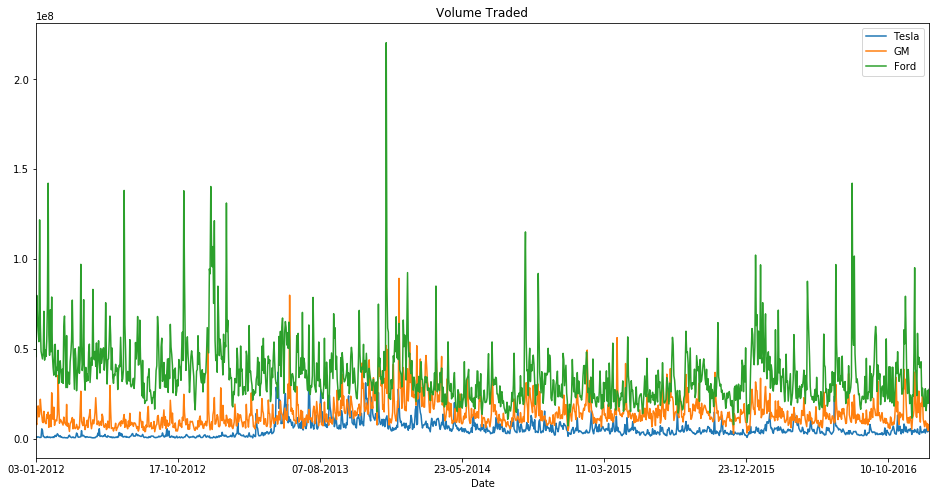

In [6]:
# Visualizing the Volume Traded
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
gmotors['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
# Semicolon below hid the legend output
plt.legend(); 

In [7]:
ford['Volume'].max()

220363000

In [18]:
# Getting the date of the spike in ford(Volume) shares for further examination
ford['Volume'].idxmax()

'18-12-2013'

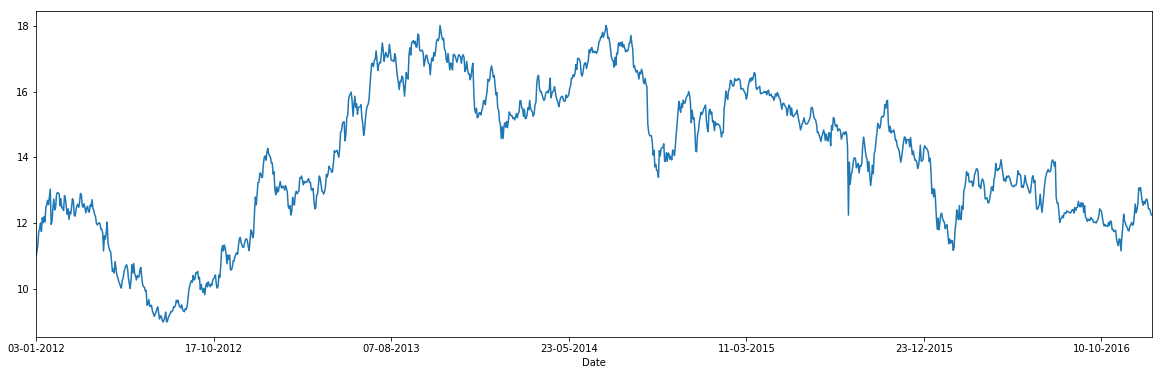

In [9]:
ford['Open'].plot(figsize=(20,6))

In [12]:
# Getting total Market cap(Not the actual value for that we need total no of stocks and price of stock on that day)
tesla['TotalTraded'] = tesla['Open'] * tesla['Volume']
ford['TotalTraded'] = ford['Open'] * ford['Volume']
gmotors['TotalTraded'] = gmotors['Open'] * gmotors['Volume']

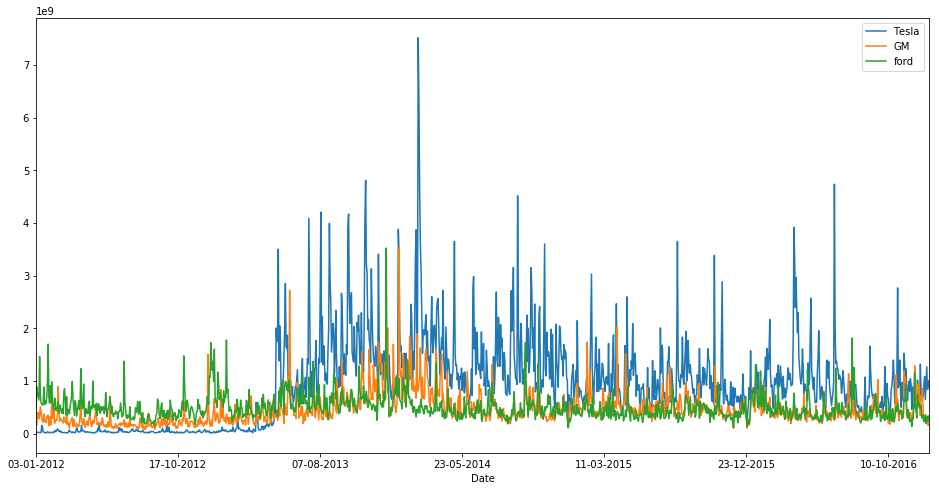

In [13]:
tesla['TotalTraded'].plot(label='Tesla', figsize=(16,8))
gmotors['TotalTraded'].plot(label='GM')
ford['TotalTraded'].plot(label='ford')
plt.legend();

In [17]:
# Getting the date of the spike(Total Traded) in tesla shares for further examination
tesla['TotalTraded'].idxmax()
# Morgan Stanley Report

'25-02-2014'

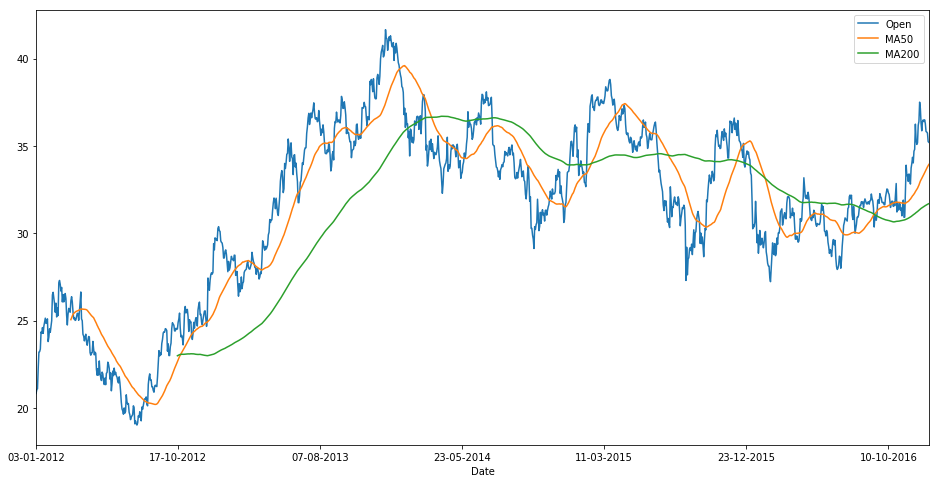

In [16]:
# Moving averages
gmotors['MA50'] = gmotors['Open'].rolling(50).mean()
gmotors['MA200'] = gmotors['Open'].rolling(200).mean()

# Plotting the data
gmotors[['Open','MA50','MA200']].plot(figsize=(16,8))


In [19]:
from pandas.plotting import scatter_matrix

In [21]:
car_comp = pd.concat([tesla['Open'],gmotors['Open'],ford['Open']],axis=1)

In [22]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [23]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
03-01-2012,28.940001,20.830000,11.00
04-01-2012,28.209999,21.049999,11.15
05-01-2012,27.760000,21.100000,11.33
06-01-2012,27.200001,22.260000,11.74
09-01-2012,27.000000,23.200001,11.83


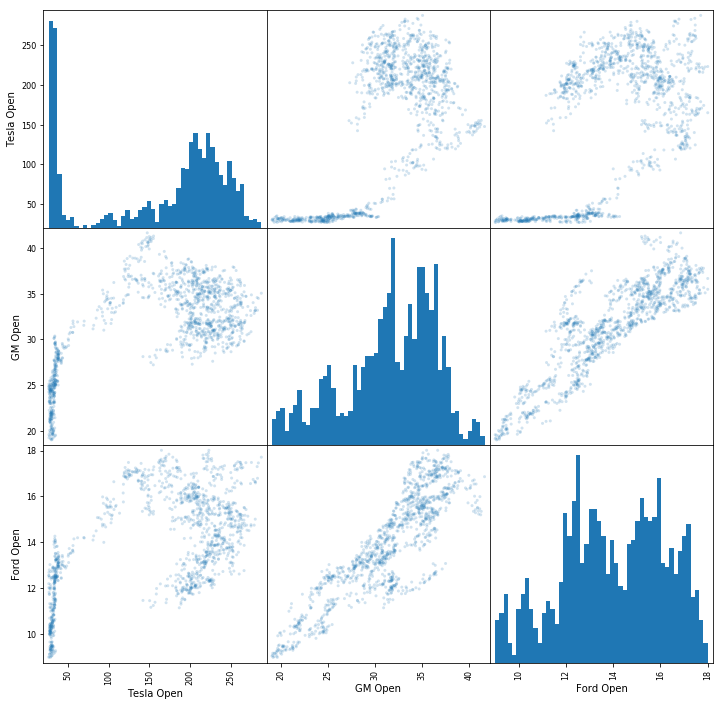

In [29]:
scatter_matrix(car_comp, figsize=(12,12), alpha=0.2, hist_kwds={'bins':50});

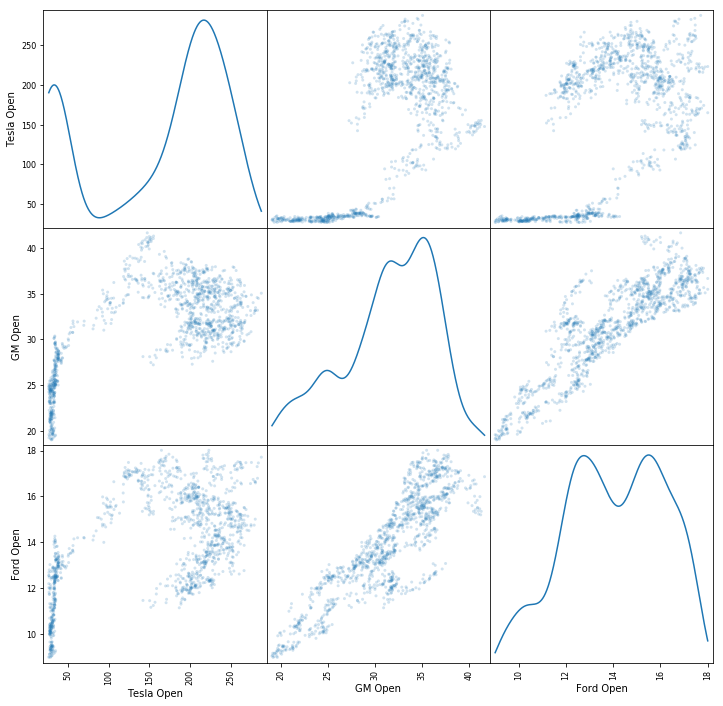

In [32]:
import scipy
scatter_matrix(car_comp, figsize=(12,12), alpha=0.2, diagonal='kde');

In [44]:
# Basic Financial Analysis
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1

In [93]:
# OR one could use(Shortcut of above command)
tesla['returns'] = tesla['Close'].pct_change(1)
gmotors['returns'] = gmotors['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)

In [105]:
#  If index of tesla is not set to Date
tesla.set_index(['Date'], inplace=True)

In [106]:
tesla.head()

,level_0,index,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns
Date,,,,,,,,,,
03-01-2012,0,0,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
04-01-2012,1,1,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
05-01-2012,2,2,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
06-01-2012,3,3,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
09-01-2012,4,4,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [120]:
tesla.drop(columns=['level_0','index'], inplace=True)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns
Date,,,,,,,,
03-01-2012,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
04-01-2012,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
05-01-2012,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
06-01-2012,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
09-01-2012,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


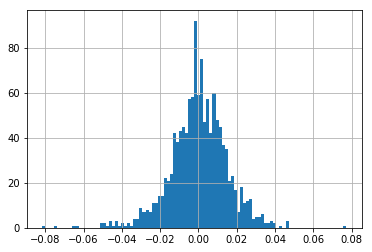

In [107]:
ford['returns'].hist(bins=100);

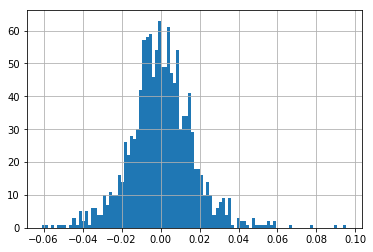

In [108]:
gmotors['returns'].hist(bins=100);

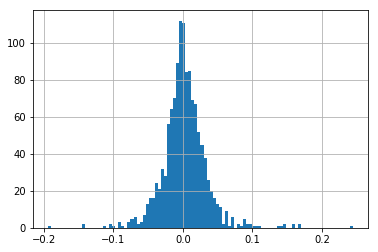

In [109]:
tesla['returns'].hist(bins=100);

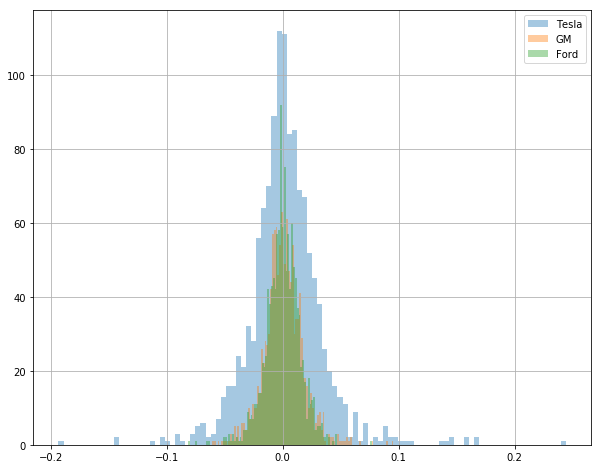

In [110]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10,8),alpha=0.4)
gmotors['returns'].hist(bins=100, label='GM', figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(10,8),alpha=0.4)
plt.legend();

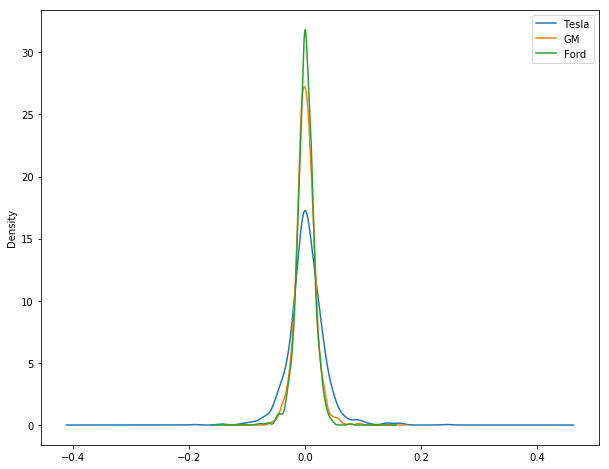

In [111]:
#  Using Kernel Denisty Estimation

tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10,8))
gmotors['returns'].plot(kind='kde', label='GM', figsize=(10,8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(10,8))
plt.legend();

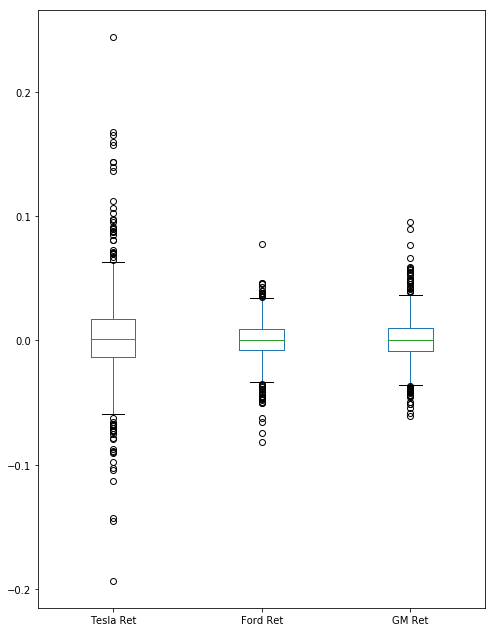

In [112]:
box_df = pd.concat([tesla['returns'], ford['returns'], gmotors['returns']], axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind='box', figsize=(8,11));

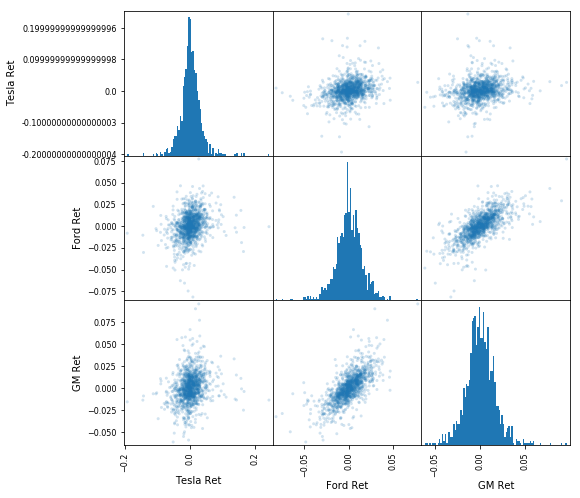

In [113]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':100});

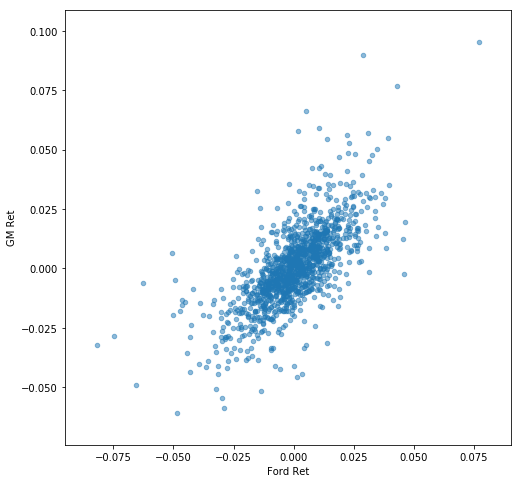

In [119]:
# As from above box plot we can see that there is some relation between ford returns and GM returns hence exploring it further
box_df.plot(kind='scatter', x='Ford Ret', y='GM Ret', alpha=0.5, figsize=(8,8));

In [122]:
tesla['Cumulative Return'] = (1+ tesla['returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns,Cumulative Return
Date,,,,,,,,,
03-01-2012,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
04-01-2012,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
05-01-2012,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
06-01-2012,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
09-01-2012,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [123]:
gmotors['Cumulative Return'] = (1+ gmotors['returns']).cumprod()
gmotors.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
03-01-2012,21.180000,20.750000,20.830000,21.049999,9321300,16.818344,1.941627e+08,NaN,NaN,NaN,NaN
04-01-2012,21.370001,20.750000,21.049999,21.150000,7856700,16.898247,1.653835e+08,NaN,NaN,0.004751,1.004751
05-01-2012,22.290001,20.959999,21.100000,22.170000,17880600,17.713190,3.772807e+08,NaN,NaN,0.048227,1.053207
06-01-2012,23.030001,22.240000,22.260000,22.920000,18234500,18.312424,4.059000e+08,NaN,NaN,0.033829,1.088836
09-01-2012,23.430000,22.700001,23.200001,22.840000,12084500,18.248503,2.803604e+08,NaN,NaN,-0.003490,1.085036


In [124]:
ford['Cumulative Return'] = (1+ ford['returns']).cumprod()
ford.head()

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns,Cumulative Return
Date,,,,,,,,,
03-01-2012,11.25,10.99,11.00,11.13,45709900,8.064753,5.028089e+08,NaN,NaN
04-01-2012,11.53,11.07,11.15,11.30,79725200,8.187930,8.889359e+08,0.015274,1.015274
05-01-2012,11.63,11.24,11.33,11.59,67877500,8.398067,7.690521e+08,0.025664,1.041330
06-01-2012,11.80,11.52,11.74,11.71,59840700,8.485017,7.025298e+08,0.010354,1.052111
09-01-2012,11.95,11.70,11.83,11.80,53981500,8.550230,6.386011e+08,0.007686,1.060198


In [127]:
tesla['Cumulative Return'].idxmax()

'04-09-2014'

In [128]:
tesla[tesla['Cumulative Return']>10]

,High,Low,Open,Close,Volume,Adj Close,TotalTraded,returns,Cumulative Return
Date,,,,,,,,,
02-09-2014,284.890015,274.299988,275.500000,284.119995,9852400,284.119995,2.714336e+09,0.053467,10.118233
03-09-2014,288.000000,280.100006,287.670013,281.190002,6772300,281.190002,1.948188e+09,-0.010313,10.013889
04-09-2014,291.420013,280.399994,284.010010,286.040008,8341700,286.040008,2.369126e+09,0.017248,10.186610
08-09-2014,284.880005,277.519989,277.619995,282.109985,5501600,282.109985,1.527354e+09,0.017016,10.046652
10-09-2014,281.410004,273.660004,279.500000,281.100006,3781300,281.100006,1.056873e+09,0.009408,10.010684
20-07-2015,286.649994,272.540008,275.000000,282.260010,4978500,282.260010,1.369088e+09,0.027671,10.051995


In [129]:
ford['Cumulative Return'].max()

1.6028751099446283

In [130]:
gmotors['Cumulative Return'].max()

1.9729216284760294

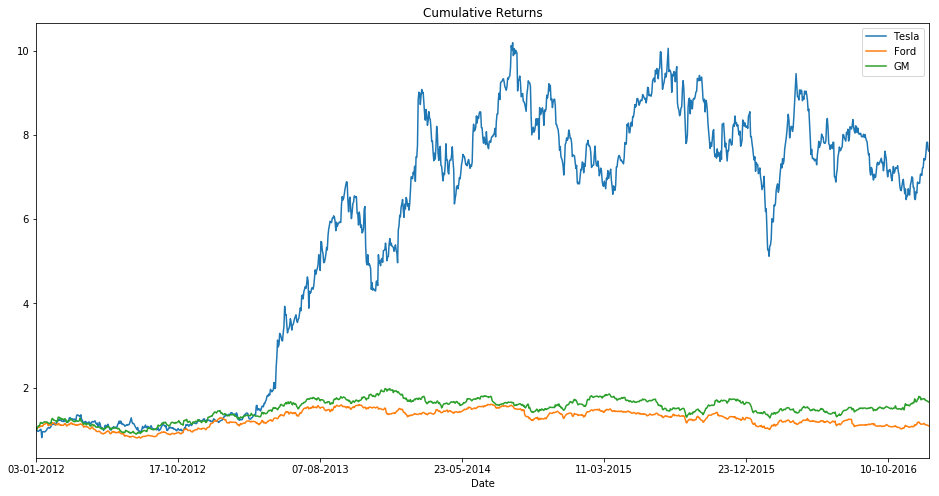

In [134]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(16,8), title='Cumulative Returns')
ford['Cumulative Return'].plot(label='Ford', figsize=(16,8))
gmotors['Cumulative Return'].plot(label='GM', figsize=(16,8))
plt.legend();

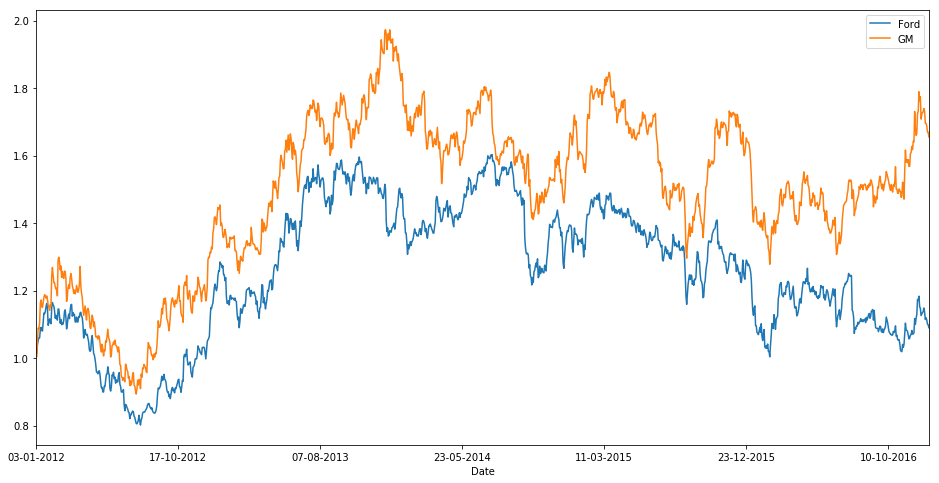

In [135]:
ford['Cumulative Return'].plot(label='Ford', figsize=(16,8))
gmotors['Cumulative Return'].plot(label='GM', figsize=(16,8))
plt.legend();